In [99]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
DIR_NORM = r"/Users/chenkx/Box Sync/NLP group/2019 n2c2 Challenge/Track 3 (normalization)/Test/norm"
DATA_DIR_TEST = "/Users/chenkx/Desktop/TBIC-not_synced/Negation/notebooks/2010Corpus/explore_i2b2-2010-v3.0-ALL_concepts-test.csv"
DATA_DIR_TRAIN = "/Users/chenkx/Desktop/TBIC-not_synced/Negation/notebooks/2010Corpus/explore_i2b2-2010-v3.0-ALL_concepts-train.csv"
FILE_SORTER = r"/Users/chenkx/Box Sync/NLP group/2019 n2c2 Challenge/Track 3 (normalization)/Test/test_file_list.txt"
DIR_TEAM_OUT = r"/Users/chenkx/Box Sync/NLP group/2019 n2c2 Challenge/Track 3 (normalization)/top10_outputs"

Load corpus and annotations from the 2019 challenge

In [3]:
with open(FILE_SORTER, 'r') as f:
    sorter = f.read().split('\n')
sorter = [i for i in sorter if i != ""]

In [4]:
# read from 2019. Concepts and offsets for each file.
filenames = [i for i in os.listdir(DIR_NORM) if i.endswith('.norm')]
df2019 = pd.DataFrame(columns=['cui_id', 'CUI', 'b', 'e', 'filename'])
for file in sorter:
    df = pd.read_csv(os.path.join(DIR_NORM, file+'.norm'), sep='\|\|', index_col = False, names=['cui_id', 'CUI', 'b', 'e'], engine='python')
    df['filename'] = file
    df2019 = pd.concat([df2019, df], ignore_index=True)
df2019.filename = df2019.filename.astype(str)
df2019["CUI-index"] = df2019.index
df2019

,cui_id,CUI,b,e,filename,CUI-index
0,N000,C0019699,232,244,0002,0
1,N001,C0238552,280,304,0002,1
2,N002,C0027497,316,322,0002,2
3,N003,C0042963,327,335,0002,3
4,N004,CUI-less,345,370,0002,4
...,...,...,...,...,...,...
6920,N235,C0376358,6573,6584,920798564,6920
6921,N236,C1827596,643,669,920798564,6921
6922,N237,C0212018,7168,7190,920798564,6922
6923,N193,C0750502,220,231,920798564,6923


Load corpus and annotations from 2010 

In [5]:
# read from 2010. Concepts, assertions, and offsets for each file.
df1 = pd.read_csv(DATA_DIR_TRAIN)
df2 = pd.read_csv(DATA_DIR_TEST)
df2010 = pd.concat([df1, df2])
df2010[["filename", "item"]] = df2010.id.str.split('::', expand=True)
df2010.set_index("id", inplace=True)
df2010 = df2010[df2010.filename.isin(sorter)]
df2010.filename = pd.Categorical(df2010.filename, sorter)
df2010

,b,e,t,a,c,s,filename,item
id,,,,,,,,
134300717::T1,62,109,problem,present,deep venous thrombosis of right lower extremity,other,134300717,T1
134300717::T2,222,269,problem,present,deep venous thrombosis of right lower extremity,Diagnoses,134300717,T2
134300717::T3,295,314,problem,present,metastatic melanoma,Diagnoses,134300717,T3
134300717::T4,464,483,problem,present,metastatic melanoma,Present illness,134300717,T4
134300717::T5,486,498,problem,present,his melanoma,Present illness,134300717,T5
...,...,...,...,...,...,...,...,...
0194::T161,7414,7425,treatment,NaN,debridement,Procedures/Surgery,0194,T161
0194::T162,7430,7449,treatment,NaN,packing of pancreas,Procedures/Surgery,0194,T162
0194::T163,7567,7579,treatment,NaN,tracheostomy,Procedures/Surgery,0194,T163


In [6]:
print("Percentage of concepts that do not have a valid section type:")
try: 
    print((df2010['s'].value_counts()['Unknown/Unclassified'] + df2010['s'].value_counts()['?'])/sum(df2010['s'].value_counts()))
except KeyError:
    print(df2010['s'].value_counts()['?']/sum(df2010['s'].value_counts()))

Percentage of concepts that do not have a valid section type:
0.08316578322061781


In [7]:
not_found = []
for i in sorter:
    if not any(df2010.filename.isin([i])):
        not_found.append(i)
if not_found:
    print(not_found)
else:
    print("The dafaframe includes all files in the list.")

The dafaframe includes all files in the list.


Map the annotations from two sources

In [8]:
merged = pd.merge(df2010, df2019, how="outer", on=['filename', 'b'])
merged = merged.sort_values(['filename', 'b'], ignore_index=True)
# merged.to_csv('tempdf.csv')
merged

,b,e_x,t,a,c,s,filename,item,cui_id,CUI,e_y,CUI-index
0,232.0,244.0,problem,present,hiv positive,Present illness,0002,T1,N000,C0019699,244,0.0
1,280.0,304.0,problem,present,left upper quadrant pain,Present illness,0002,T2,N001,C0238552,304,1.0
2,316.0,322.0,problem,present,nausea,Present illness,0002,T3,N002,C0027497,322,2.0
3,327.0,335.0,problem,present,vomiting,Present illness,0002,T4,N003,C0042963,335,3.0
4,345.0,370.0,problem,present,a long standing complaint,Present illness,0002,T5,N004,CUI-less,370,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7370,7323.0,7341.0,treatment,NaN,sodium bicarbonate,Medications,920798564,T171,N171,C0074722,7341,6860.0
7371,7385.0,7392.0,treatment,NaN,proscar,Medications,920798564,T172,N172,C0678149,7392,6861.0
7372,7418.0,7425.0,treatment,NaN,casodex,Medications,920798564,T173,N173,C0591237,7425,6862.0
7373,7452.0,7462.0,treatment,NaN,nephrocaps,Medications,920798564,T174,N174,C0306965,7462,6863.0


<ipython-input-159-792cf3027501>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gold.a[gold.t=='treatment'] = 'N/A-treatment'


In [171]:
# Remove non-normalized concepts and keep only the reference anntotation. 
gold = merged[merged.CUI.notna()]
gold = gold.sort_values('CUI-index')
gold.a[(gold.t=='treatment') | (gold.t=='test')] = 'N/A-non-problems'
gold.a = gold.a.fillna("N/A-No_mapping")
gold

<ipython-input-171-e2747ca45e56>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gold.a[(gold.t=='treatment') | (gold.t=='test')] = 'N/A-non-problems'


,b,e_x,t,a,c,s,filename,item,cui_id,CUI,e_y,CUI-index
0,232.0,244.0,problem,present,hiv positive,Present illness,0002,T1,N000,C0019699,244,0.0
1,280.0,304.0,problem,present,left upper quadrant pain,Present illness,0002,T2,N001,C0238552,304,1.0
2,316.0,322.0,problem,present,nausea,Present illness,0002,T3,N002,C0027497,322,2.0
3,327.0,335.0,problem,present,vomiting,Present illness,0002,T4,N003,C0042963,335,3.0
4,345.0,370.0,problem,present,a long standing complaint,Present illness,0002,T5,N004,CUI-less,370,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7357,6573.0,NaN,NaN,N/A-No_mapping,NaN,NaN,920798564,NaN,N235,C0376358,6584,6920.0
7172,643.0,NaN,NaN,N/A-No_mapping,NaN,NaN,920798564,NaN,N236,C1827596,669,6921.0
7366,7168.0,7175.0,treatment,N/A-non-problems,niferex,Medications,920798564,T167,N237,C0212018,7190,6922.0
7158,220.0,240.0,problem,present,significant problems,Problems,920798564,T4,N193,C0750502,231,6923.0


## Stats

- Some concepts in the 2019 challenges do not appear in the 2010 challenge. Therefore their assertion status are unknown. 
- Some normalized concepts do not have an assertion status.
- For those concepts that do have an assertion status, % of them can not be assigned to a section. 

In [27]:
gold.s.value_counts()

Hospital course                     1400
Present illness                      790
Laboratory tests                     522
Physical examination/Status          457
?                                    425
Medications                          360
Past history                         289
Subsection                           188
Diagnoses                            182
Procedures/Surgery                    96
Follow-up/Instructions                80
Allergies                             50
Review of systems                     46
other                                 42
Problems                              21
Assessment/Plan                       18
Investigations/Results                17
Radiology                             16
Chief complaint                       12
Family history                        10
Date/Time                              6
Reasons/Indications                    5
Patient information/Demographics       4
Social history                         3
Complications   

In [28]:
len(gold.index)

6925

## Analysis

In [115]:
# set plotting config 
sns.set(rc={"figure.figsize":(32, 16)}) #width=32, height=16
sns.set(font_scale=2) #increase font size of all elements

In [150]:
acc = []
for team in os.listdir(DIR_TEAM_OUT):
    with open(os.path.join(DIR_TEAM_OUT, team), 'r') as f:
        lines = f.readlines()
    if len(lines) != len(gold.index):
        print(team)
        continue
    tmpres = pd.Series(lines).str.strip() == gold.CUI.reset_index(drop=True)
#     tmpres = tmpres.groupby(['s'])['out'].sum().rename_axis(['Assertion']).reset_index(name=team[11:-4])
#     res = pd.merge(res, tmpres, how='outer', on=['Assertion'])
    acc.append(tmpres.sum()/len(gold.index))

In [151]:
acc

[0.8193501805054152,
 0.8105415162454873,
 0.8079422382671481,
 0.8012996389891697,
 0.8166064981949458,
 0.7956678700361011,
 0.7961010830324909,
 0.8101083032490974,
 0.8005776173285198,
 0.8525631768953068]

### By assertion types

In [172]:
res = gold.a.value_counts().rename_axis(['Assertion']).reset_index(name='counts')
for team in os.listdir(DIR_TEAM_OUT):
    with open(os.path.join(DIR_TEAM_OUT, team), 'r') as f:
        lines = f.readlines()
    if len(lines) != len(gold.index):
        print(team)
        continue
    tmpres = pd.DataFrame({'s':gold.a, 'out':pd.Series(lines).str.strip() == gold.CUI.reset_index(drop=True)})
    tmpres = tmpres.groupby(['s'])['out'].sum().rename_axis(['Assertion']).reset_index(name=team[11:-4])
    res = pd.merge(res, tmpres, how='outer', on=['Assertion'])
res.iloc[:, 2:] = res.iloc[:, 2:].apply(lambda x: x/res.counts, axis=0)
res

,Assertion,counts,KP,Ali,UWM,UAv,UAZ,NaCT,MIT,MDQ,ezDI,TTI
0,N/A-non-problems,2816,0.765270,0.754616,0.753906,0.748224,0.762429,0.738636,0.740412,0.752131,0.746094,0.796875
1,N/A-No_mapping,1881,0.771398,0.759702,0.755981,0.757044,0.771398,0.743753,0.745880,0.765019,0.744285,0.804891
2,present,1475,0.761356,0.754576,0.760000,0.746441,0.766102,0.752542,0.747119,0.751864,0.760000,0.798644
3,absent,579,0.808290,0.794473,0.784111,0.773748,0.780656,0.780656,0.780656,0.799655,0.792746,0.818653
4,possible,91,0.769231,0.769231,0.758242,0.747253,0.780220,0.758242,0.791209,0.769231,0.747253,0.780220
5,hypothetical,42,0.809524,0.785714,0.785714,0.785714,0.785714,0.761905,0.809524,0.833333,0.785714,0.833333
6,conditional,27,0.740741,0.740741,0.777778,0.814815,0.814815,0.740741,0.814815,0.814815,0.740741,0.740741
7,associated_with_someone_else,14,0.714286,0.857143,0.785714,0.714286,0.714286,0.642857,0.642857,0.785714,0.714286,0.857143


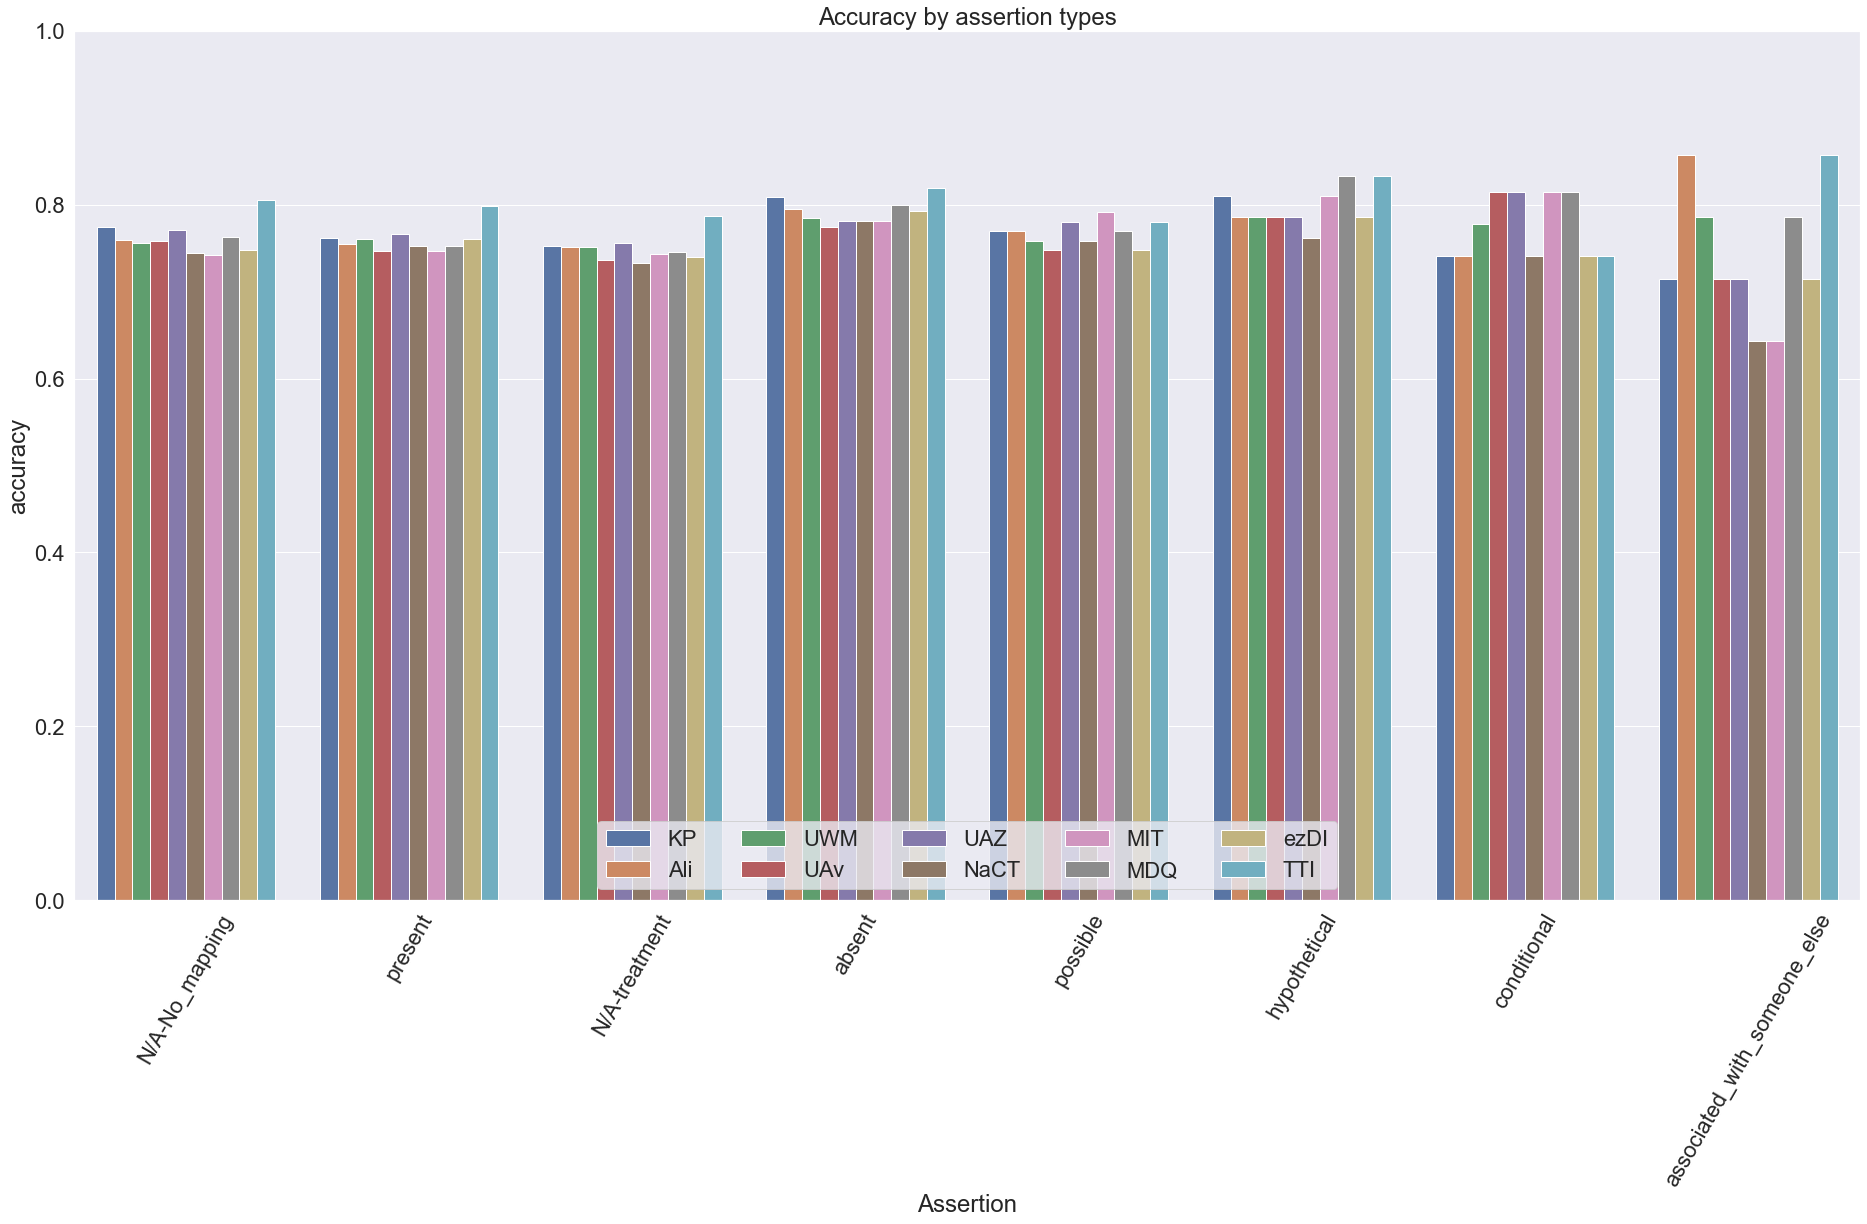

In [163]:
plotdata = pd.melt(res, id_vars=['Assertion', 'counts'], value_vars=['KP', 'Ali', 'UWM', 'UAv', 'UAZ', 'NaCT', 'MIT', 'MDQ','ezDI', 'TTI'], var_name='team', value_name='accuracy')
ax = sns.barplot(x= 'Assertion', y='accuracy', hue='team', data=plotdata)
ax.tick_params(axis='x', rotation=60)
plt.legend(loc='lower center', ncol=5) # bbox_to_anchor=(0.5, 1.05)
plt.ylim(0,1)
plt.title('Accuracy by assertion types')

plt.show()

In [138]:
res_diff = res.copy()
res_diff.iloc[:, 2:] = res.iloc[:, 2:].apply(lambda x:x-acc, axis=1)
res_diff

,Assertion,counts,KP,Ali,UWM,UAv,UAZ,NaCT,MIT,MDQ,ezDI,TTI
0,present,1475,-0.057994,-0.055965,-0.047942,-0.054859,-0.050505,-0.043125,-0.048982,-0.058244,-0.040578,-0.053919
1,absent,579,-0.011060,-0.016068,-0.023832,-0.027552,-0.035950,-0.015012,-0.015445,-0.010454,-0.007832,-0.033910
2,possible,91,-0.050119,-0.041311,-0.049700,-0.054047,-0.036387,-0.037426,-0.004892,-0.040878,-0.053325,-0.072343
3,hypothetical,42,-0.009826,-0.024827,-0.022228,-0.015585,-0.030892,-0.033763,0.013423,0.023225,-0.014863,-0.019230
4,conditional,27,-0.078609,-0.069801,-0.030164,0.013515,-0.001792,-0.054927,0.018714,0.004707,-0.059837,-0.111822
5,associated_with_someone_else,14,-0.105064,0.046601,-0.022228,-0.087014,-0.102321,-0.152811,-0.153244,-0.024394,-0.086292,0.004580


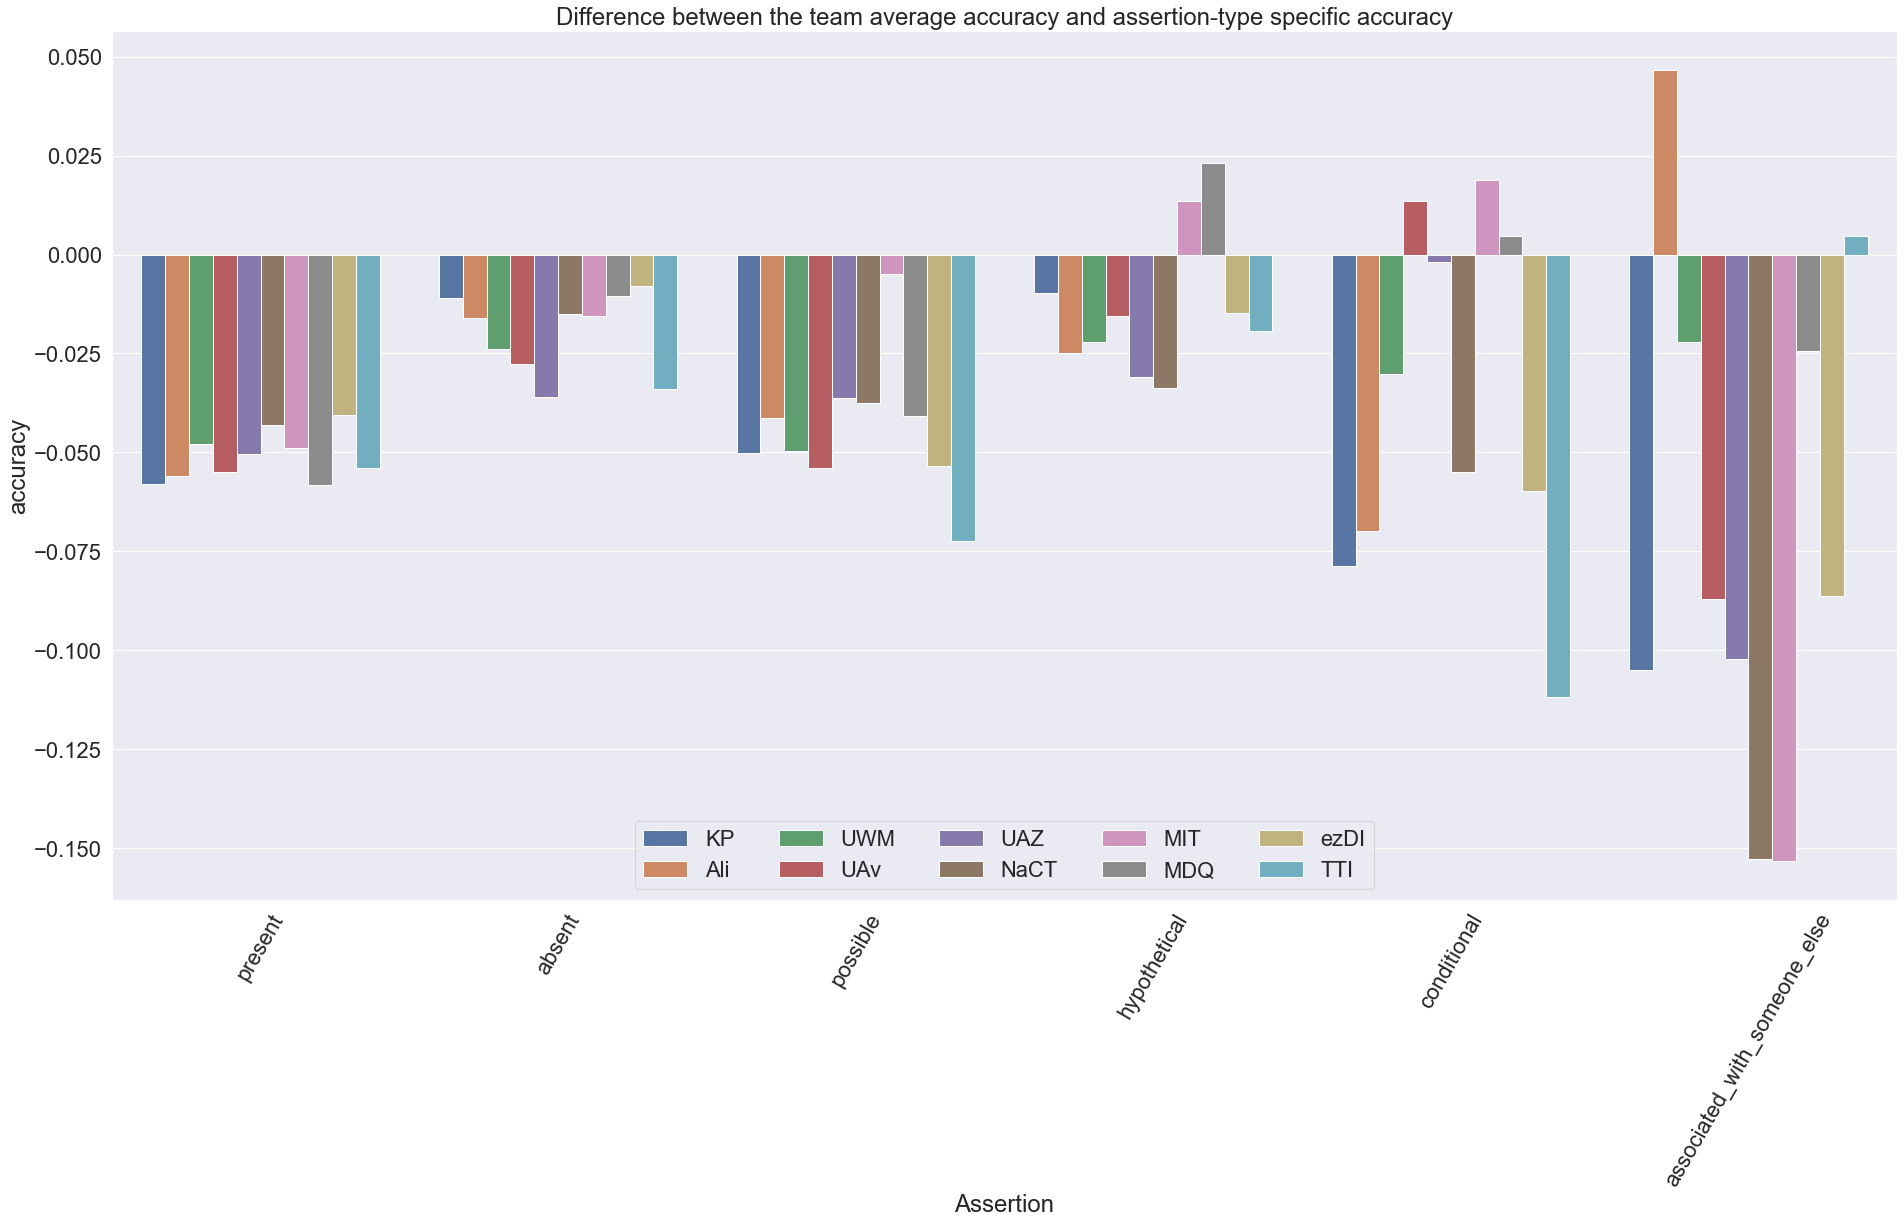

In [173]:
plotdata = pd.melt(res_diff, id_vars=['Assertion', 'counts'], value_vars=['KP', 'Ali', 'UWM', 'UAv', 'UAZ', 'NaCT', 'MIT', 'MDQ','ezDI', 'TTI'], var_name='team', value_name='accuracy')
ax = sns.barplot(x= 'Assertion', y='accuracy', hue='team', data=plotdata)
ax.tick_params(axis='x', rotation=60)
plt.legend(loc='lower center', ncol=5) # bbox_to_anchor=(0.5, 1.05)
plt.title('Difference between the team average accuracy and assertion-type specific accuracy')

plt.show()

### By assertion and section

In [290]:
res = None
for team in os.listdir(DIR_TEAM_OUT):
    with open(os.path.join(DIR_TEAM_OUT, team), 'r') as f:
        lines = f.readlines()
    if len(lines) != len(gold.index):
        print(team)
        continue
    tmpres = pd.DataFrame({'s':gold.s, 'a':gold.a, 'out':pd.Series(lines).str.strip() == gold.CUI.reset_index(drop=True)}).value_counts().rename_axis(['Section','Assertion','-']).reset_index(name=team[11:-4])
    if res is None:
        res = tmpres
    else:
        res = pd.merge(res, tmpres, how='outer', on=['Section', 'Assertion', '-'])

In [291]:
res = res.sort_values(['Section', 'Assertion', '-'])
# res.to_csv('results.csv')

In [292]:
res

,Section,Assertion,-,KP,Ali,UWM,UAv,UAZ,NaCT,MIT,MDQ,ezDI,TTI
14,?,absent,False,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29,29.0
49,?,absent,True,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3,3.0
51,?,conditional,False,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3,3.0
30,?,hypothetical,False,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7,7.0
68,?,hypothetical,True,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,Subsection,absent,True,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4,4.0
13,Subsection,present,False,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31,31.0
66,Subsection,present,True,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1.0
12,other,present,False,33.0,33.0,33.0,33.0,33.0,33.0,33.0,33.0,33,33.0


In [293]:
longtb = pd.melt(res, id_vars=['Section', 'Assertion', '-'], value_vars=['KP', 'Ali', 'UWM', 'UAv', 'UAZ', 'NaCT', 'MIT', 'MDQ','ezDI', 'TTI'], var_name='team', value_name='counts')
longtb

,Section,Assertion,-,team,counts
0,?,absent,False,KP,29.0
1,?,absent,True,KP,3.0
2,?,conditional,False,KP,3.0
3,?,hypothetical,False,KP,7.0
4,?,hypothetical,True,KP,1.0
...,...,...,...,...,...
835,Subsection,absent,True,TTI,4.0
836,Subsection,present,False,TTI,31.0
837,Subsection,present,True,TTI,1.0
838,other,present,False,TTI,33.0


In [294]:
tmpdf = pd.pivot(longtb, index=['Section','Assertion','team'], columns='-', values='counts')
tmpdf.to_csv('results.csv')